<a href="https://colab.research.google.com/github/MayurPatil2711/SURE-IIT-Hyderabad/blob/main/Non_Dimensional_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.lines as mlines

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data for 25 mm

In [3]:
filepath = '/content/drive/MyDrive/IITH SURE/Same Diameter Data.xlsx'
mm_25_data = pd.read_excel(filepath, sheet_name='Diameter_25mm')
mm_25_data.head()

,Gap Width Theoretical (in mm),Gap Width Experimental (in mm),Offset from Centre,Exp No.,Max Radius (in pixels),Conversion Factor (in pixels/mm),Max. Radius (in mm),W',W' avg.,Bubble Behaviour,Jet's Direction,Mean Radius (in mm),Std. Deviation Radius (in mm),Mean Gap Width Experimental (in mm),Std. Deviation Gap Width Experimental (in mm),Remarks
0,20.0,20.087,0.1250,1.0,55.0,7.6667,7.173882,2.800018,2.801461,Jetting Towards Nearer Wall,Towards nearer solid wall with high velocity,6.861112,0.337745,18.274815,0.901416,NaN
1,NaN,19.220,NaN,2.0,52.0,7.5833,6.857173,2.802904,NaN,Jetting Towards Nearer Wall,Towards nearer solid wall with high velocity,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,19.043,0.0625,1.0,51.0,7.5750,6.732673,2.828446,2.843198,Split Collapse,Equal flow towards both walls,NaN,NaN,NaN,NaN,Larger volume of jet towards larger diameter c...
4,NaN,18.834,NaN,2.0,49.0,7.5750,6.468647,2.911583,NaN,Jetting Towards Nearer Wall,Towards nearer solid wall with medium velocity,NaN,NaN,NaN,NaN,NaN


In [4]:
required_data = mm_25_data[['Gap Width Experimental (in mm)', 'Offset from Centre', "W'", 'Bubble Behaviour', "Max. Radius (in mm)"]]
required_data = required_data.dropna(how='all')
required_data = required_data.fillna(method='ffill')
required_data["b"] = required_data["Gap Width Experimental (in mm)"]*required_data['Offset from Centre']
required_data["b'"] = required_data['Offset from Centre']
required_data["r'"] = required_data["Max. Radius (in mm)"]/12.5
required_data["s'"] = required_data["Gap Width Experimental (in mm)"] * required_data["Offset from Centre"]/12.5
required_data["c'"] = required_data["b"]/required_data["Max. Radius (in mm)"]
required_data["a'"] = required_data["Gap Width Experimental (in mm)"]/12.5
required_data["p'"] = ((required_data["Max. Radius (in mm)"] * 12.5)**0.5) / required_data["Gap Width Experimental (in mm)"]
required_data["B"] = required_data["Gap Width Experimental (in mm)"]/2 - required_data["b"]
required_data["B'"] = 0.5 - required_data["b'"]
required_data["e'"] = required_data["B"] / 12.5
required_data["f'"] = required_data["B"] / required_data["Max. Radius (in mm)"]
required_data.head()

,Gap Width Experimental (in mm),Offset from Centre,W',Bubble Behaviour,Max. Radius (in mm),b,b',r',s',c',a',p',B,B',e',f'
0,20.087,0.1250,2.800018,Jetting Towards Nearer Wall,7.173882,2.510875,0.1250,0.573911,0.200870,0.350002,1.60696,0.471430,7.532625,0.3750,0.602610,1.050007
1,19.220,0.1250,2.802904,Jetting Towards Nearer Wall,6.857173,2.402500,0.1250,0.548574,0.192200,0.350363,1.53760,0.481697,7.207500,0.3750,0.576600,1.051089
3,19.043,0.0625,2.828446,Split Collapse,6.732673,1.190187,0.0625,0.538614,0.095215,0.176778,1.52344,0.481741,8.331312,0.4375,0.666505,1.237445
4,18.834,0.0625,2.911583,Jetting Towards Nearer Wall,6.468647,1.177125,0.0625,0.517492,0.094170,0.181974,1.50672,0.477440,8.239875,0.4375,0.659190,1.273817
5,18.717,0.0625,2.789567,Jetting Towards Nearer Wall,6.709643,1.169812,0.0625,0.536771,0.093585,0.174348,1.49736,0.489292,8.188688,0.4375,0.655095,1.220436


In [5]:
mm_25_spherical_collapse = required_data[required_data['Bubble Behaviour'] == 'Spherical Collapse']
mm_25_spherical_collapse = mm_25_spherical_collapse.sort_values(by = "s'", ascending=0)

mm_25_jetting_towards = required_data[required_data['Bubble Behaviour'] == 'Jetting Towards Nearer Wall']
mm_25_jetting_towards = mm_25_jetting_towards.sort_values(by = "b", ascending=0).iloc[2:, :]

mm_25_jetting_away = required_data[required_data['Bubble Behaviour'] == 'Jetting Away From Nearer Wall']
mm_25_jetting_away = mm_25_jetting_away.sort_values(by = "b", ascending=0)

mm_25_split_collapse = required_data[required_data['Bubble Behaviour'] == 'Split Collapse']
mm_25_split_collapse = mm_25_split_collapse.sort_values(by = "b", ascending=0)

mm_25_centre_collapse = required_data[required_data['Bubble Behaviour'] == 'Centre Collapse']
mm_25_centre_collapse = mm_25_centre_collapse.sort_values(by = "b", ascending=0).iloc[:-1, :]

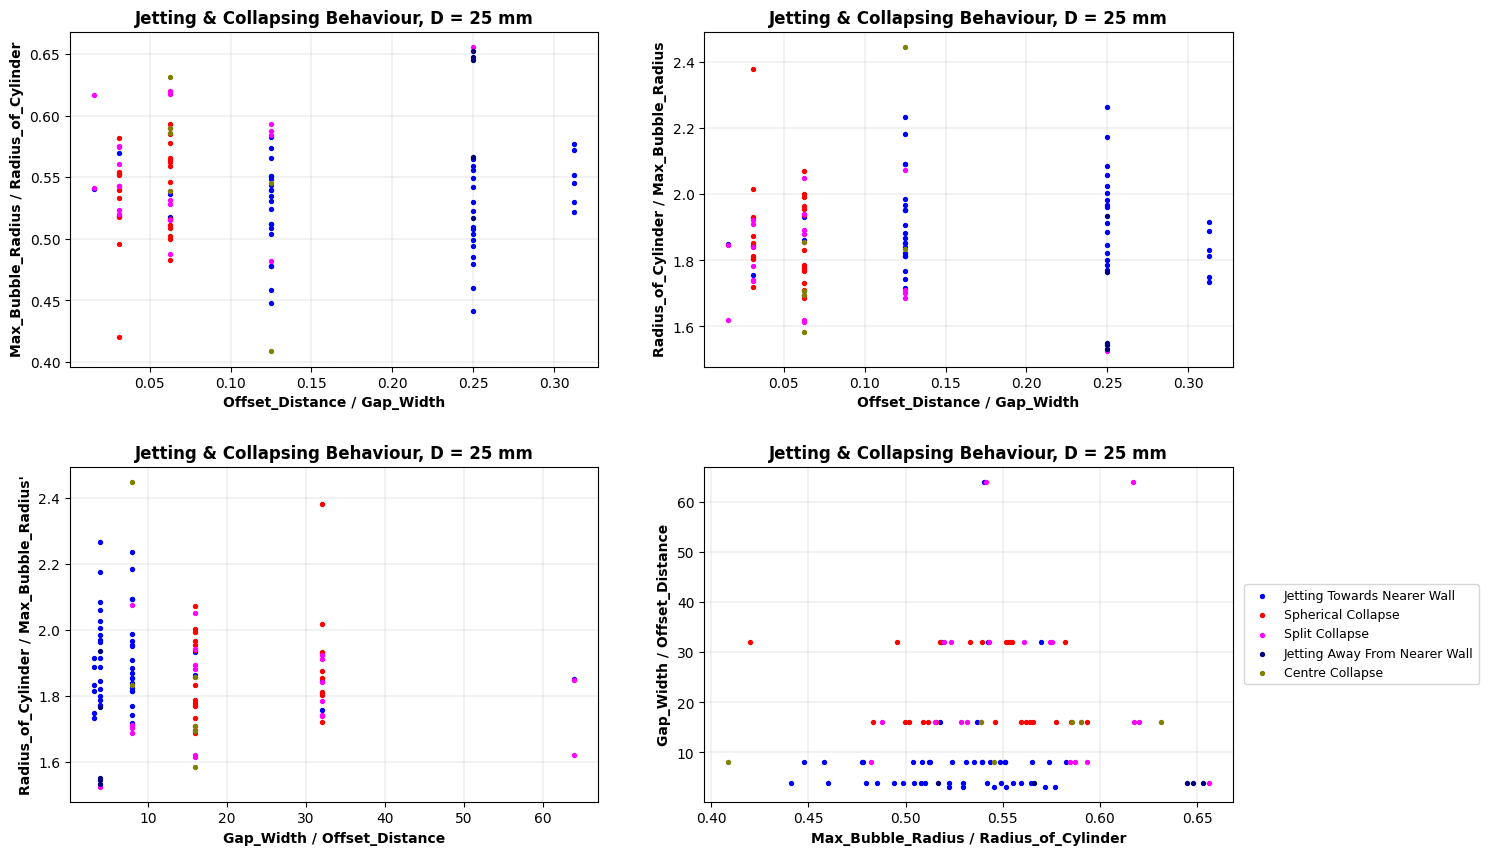

In [6]:
plt.figure(figsize = (15, 10))

plt.subplot(2,2,1)
plt.scatter(mm_25_jetting_towards["b'"], mm_25_jetting_towards["r'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(mm_25_spherical_collapse["b'"], mm_25_spherical_collapse["r'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(mm_25_split_collapse["b'"], mm_25_split_collapse["r'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(mm_25_jetting_away["b'"], mm_25_jetting_away["r'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter(mm_25_centre_collapse["b'"], mm_25_centre_collapse["r'"], color = 'olive', label = "Centre Collapse", s = 8)
plt.xlabel("Offset_Distance / Gap_Width", fontweight = "bold"), plt.ylabel("Max_Bubble_Radius / Radius_of_Cylinder", fontweight = "bold")
#plt.legend(fontsize=9, bbox_to_anchor=(1.2, 0.5), loc='center left'),
plt.grid(True, color='black', linestyle='--', linewidth=0.1), plt.title('Jetting & Collapsing Behaviour, D = 25 mm', fontweight = "bold")
#plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/W'-b 25 mm.png")

plt.subplot(2,2,2)
plt.scatter(mm_25_jetting_towards["b'"], 1/mm_25_jetting_towards["r'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(mm_25_spherical_collapse["b'"], 1/mm_25_spherical_collapse["r'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(mm_25_split_collapse["b'"], 1/mm_25_split_collapse["r'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(mm_25_jetting_away["b'"], 1/mm_25_jetting_away["r'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter(mm_25_centre_collapse["b'"], 1/mm_25_centre_collapse["r'"], color = 'olive', label = "Centre Collapse", s = 8)
plt.xlabel("Offset_Distance / Gap_Width", fontweight = "bold"), plt.ylabel("Radius_of_Cylinder / Max_Bubble_Radius", fontweight = "bold")
#plt.legend(fontsize=9, bbox_to_anchor=(1.2, 0.5), loc='center left'),
plt.grid(True, color='black', linestyle='--', linewidth=0.1), plt.title('Jetting & Collapsing Behaviour, D = 25 mm', fontweight = "bold")
#plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/W'-b 25 mm.png")

plt.subplot(2,2,3)
plt.scatter(1/mm_25_jetting_towards["b'"], 1/mm_25_jetting_towards["r'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(1/mm_25_spherical_collapse["b'"], 1/mm_25_spherical_collapse["r'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(1/mm_25_split_collapse["b'"], 1/mm_25_split_collapse["r'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(1/mm_25_jetting_away["b'"], 1/mm_25_jetting_away["r'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter(1/mm_25_centre_collapse["b'"], 1/mm_25_centre_collapse["r'"], color = 'olive', label = "Centre Collapse", s = 8)
plt.xlabel("Gap_Width / Offset_Distance", fontweight = "bold"), plt.ylabel("Radius_of_Cylinder / Max_Bubble_Radius'", fontweight = "bold")
#plt.legend(fontsize=9, bbox_to_anchor=(1.01, 0.5), loc='center left'),
plt.grid(True, color='black', linestyle='--', linewidth=0.1), plt.title('Jetting & Collapsing Behaviour, D = 25 mm', fontweight = "bold")
#plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/W'-b 25 mm.png")

plt.subplot(2,2,4)
plt.scatter(y = 1/mm_25_jetting_towards["b'"], x = mm_25_jetting_towards["r'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(y = 1/mm_25_spherical_collapse["b'"], x = mm_25_spherical_collapse["r'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(y = 1/mm_25_split_collapse["b'"], x = mm_25_split_collapse["r'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(y = 1/mm_25_jetting_away["b'"], x = mm_25_jetting_away["r'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter(y = 1/mm_25_centre_collapse["b'"], x = mm_25_centre_collapse["r'"], color = 'olive', label = "Centre Collapse", s = 8)
plt.ylabel("Gap_Width / Offset_Distance", fontweight = "bold"), plt.xlabel("Max_Bubble_Radius / Radius_of_Cylinder", fontweight = "bold")
plt.legend(fontsize=9, bbox_to_anchor=(1.01, 0.5), loc='center left'), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour, D = 25 mm', fontweight = "bold")
#plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/W'-b 25 mm.png")

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

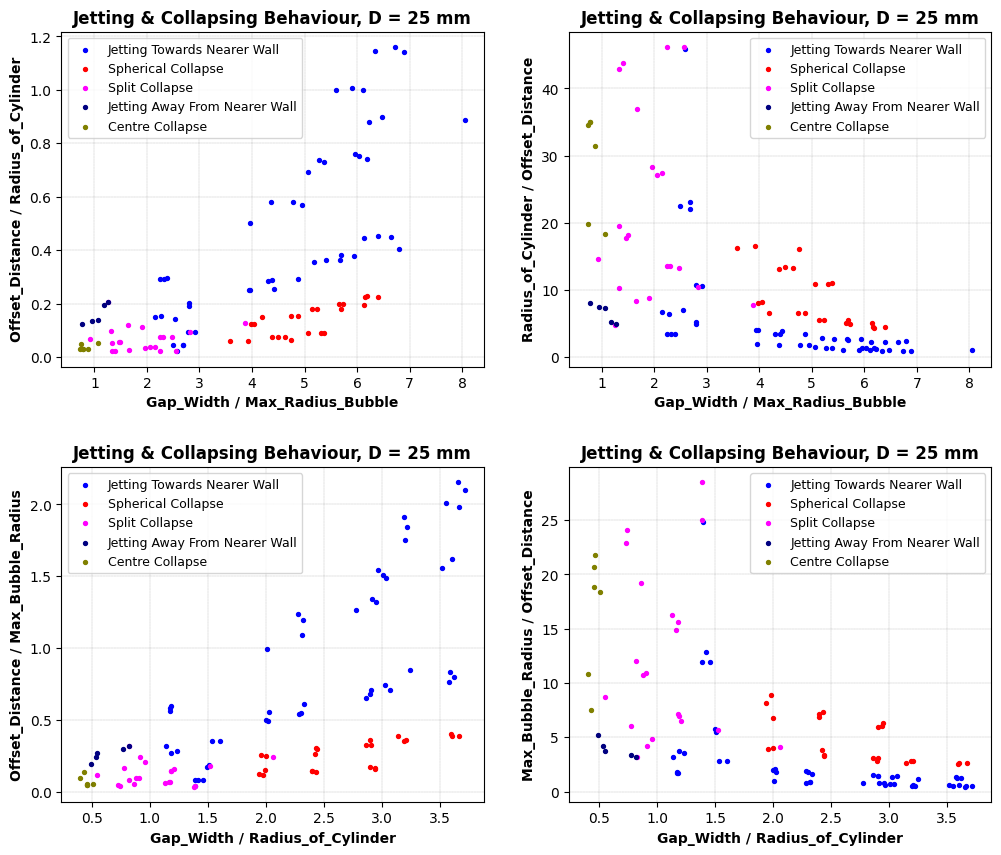

In [24]:
plt.figure(figsize = (12, 10))

plt.subplot(2,2,1)
plt.scatter(mm_25_jetting_towards["W'"], mm_25_jetting_towards["s'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(mm_25_spherical_collapse["W'"], mm_25_spherical_collapse["s'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(mm_25_split_collapse["W'"], mm_25_split_collapse["s'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(mm_25_jetting_away["W'"], mm_25_jetting_away["s'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter(mm_25_centre_collapse["W'"], mm_25_centre_collapse["s'"], color = 'olive', label = "Centre Collapse", s = 8)
plt.ylabel("Offset_Distance / Radius_of_Cylinder", fontweight = "bold"), plt.xlabel("Gap_Width / Max_Radius_Bubble", fontweight = "bold")
plt.legend(fontsize = 9), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour, D = 25 mm', fontweight = "bold")
#plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/W'-f' 25 mm.png")

plt.subplot(2,2,2)
plt.scatter(mm_25_jetting_towards["W'"], 1/mm_25_jetting_towards["s'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(mm_25_spherical_collapse["W'"], 1/mm_25_spherical_collapse["s'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(mm_25_split_collapse["W'"], 1/mm_25_split_collapse["s'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(mm_25_jetting_away["W'"], 1/mm_25_jetting_away["s'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter(mm_25_centre_collapse["W'"], 1/mm_25_centre_collapse["s'"], color = 'olive', label = "Centre Collapse", s = 8)
plt.ylabel("Radius_of_Cylinder / Offset_Distance", fontweight = "bold"), plt.xlabel("Gap_Width / Max_Radius_Bubble", fontweight = "bold")
plt.legend(fontsize = 9), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour, D = 25 mm', fontweight = "bold")

plt.subplot(2,2,3)
plt.scatter(y = mm_25_jetting_towards["c'"], x = mm_25_jetting_towards["a'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(y = mm_25_spherical_collapse["c'"], x = mm_25_spherical_collapse["a'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(y = mm_25_split_collapse["c'"], x = mm_25_split_collapse["a'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(y = mm_25_jetting_away["c'"], x = mm_25_jetting_away["a'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter(y = mm_25_centre_collapse["c'"], x = mm_25_centre_collapse["a'"], color = 'olive', label = "Centre Collapse", s = 8)
plt.ylabel("Offset_Distance / Max_Bubble_Radius", fontweight = "bold"), plt.xlabel("Gap_Width / Radius_of_Cylinder", fontweight = "bold")
plt.legend(fontsize = 9), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour, D = 25 mm', fontweight = "bold")
#plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/a'-c' 25 mm.png")

plt.subplot(2,2,4)
plt.scatter(y = 1/mm_25_jetting_towards["c'"], x = mm_25_jetting_towards["a'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(y = 1/mm_25_spherical_collapse["c'"], x = mm_25_spherical_collapse["a'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(y = 1/mm_25_split_collapse["c'"], x = mm_25_split_collapse["a'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(y = 1/mm_25_jetting_away["c'"], x = mm_25_jetting_away["a'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter(y = 1/mm_25_centre_collapse["c'"], x = mm_25_centre_collapse["a'"], color = 'olive', label = "Centre Collapse", s = 8)
plt.ylabel("Max_Bubble_Radius / Offset_Distance", fontweight = "bold"), plt.xlabel("Gap_Width / Radius_of_Cylinder", fontweight = "bold")
plt.legend(fontsize = 9), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour, D = 25 mm', fontweight = "bold")

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

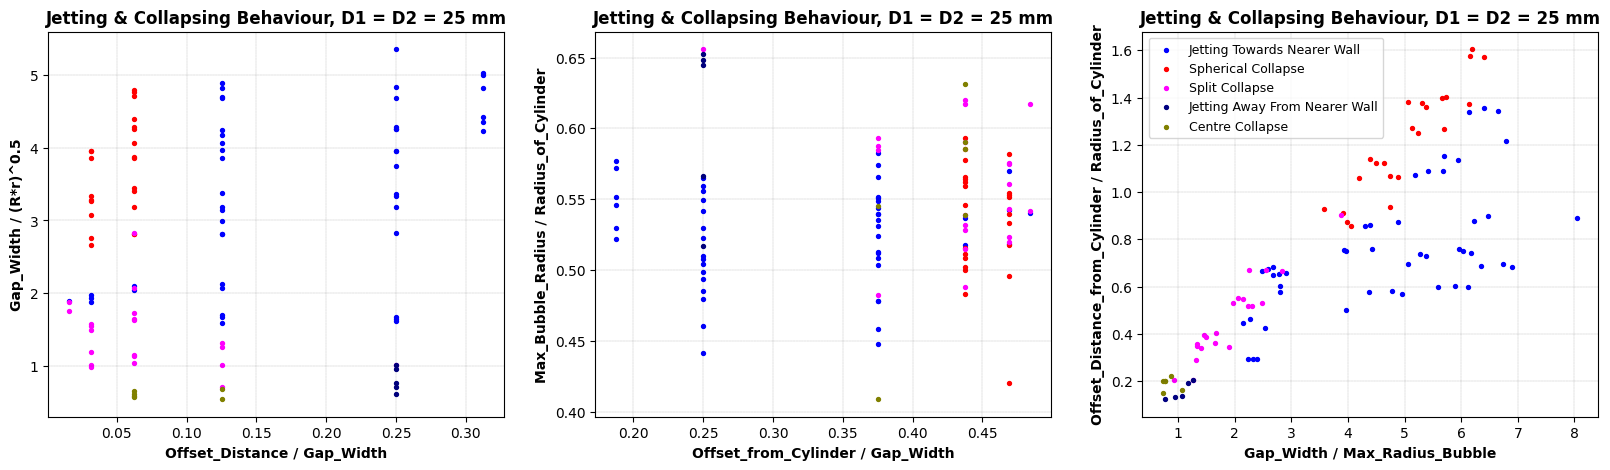

In [8]:
plt.figure(figsize = (20, 5))

plt.subplot(1,3,1)
plt.scatter(mm_25_jetting_towards["b'"], 1/mm_25_jetting_towards["p'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(mm_25_spherical_collapse["b'"], 1/mm_25_spherical_collapse["p'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(mm_25_split_collapse["b'"], 1/mm_25_split_collapse["p'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(mm_25_jetting_away["b'"], 1/mm_25_jetting_away["p'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter(mm_25_centre_collapse["b'"], 1/mm_25_centre_collapse["p'"], color = 'olive', label = "Centre Collapse", s = 8)
plt.ylabel("Gap_Width / (R*r)^0.5", fontweight = "bold"), plt.xlabel("Offset_Distance / Gap_Width", fontweight = "bold")
#plt.legend(fontsize = 9),
plt.grid(True, color='black', linestyle='--', linewidth=0.1), plt.title('Jetting & Collapsing Behaviour, D1 = D2 = 25 mm', fontweight = "bold")
#plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/W'-b 25 mm.png")

plt.subplot(1,3,2)
plt.scatter(mm_25_jetting_towards["B'"], mm_25_jetting_towards["r'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(mm_25_spherical_collapse["B'"], mm_25_spherical_collapse["r'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(mm_25_split_collapse["B'"], mm_25_split_collapse["r'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(mm_25_jetting_away["B'"], mm_25_jetting_away["r'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter(mm_25_centre_collapse["B'"], mm_25_centre_collapse["r'"], color = 'olive', label = "Centre Collapse", s = 8)
plt.ylabel("Max_Bubble_Radius / Radius_of_Cylinder", fontweight = "bold"), plt.xlabel("Offset_from_Cylinder / Gap_Width", fontweight = "bold")
#plt.legend(fontsize = 9),
plt.grid(True, color='black', linestyle='--', linewidth=0.1), plt.title('Jetting & Collapsing Behaviour, D1 = D2 = 25 mm', fontweight = "bold")
#plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/W'-b 25 mm.png")

plt.subplot(1,3,3)
plt.scatter(mm_25_jetting_towards["W'"], mm_25_jetting_towards["e'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(mm_25_spherical_collapse["W'"], mm_25_spherical_collapse["e'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(mm_25_split_collapse["W'"], mm_25_split_collapse["e'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(mm_25_jetting_away["W'"], mm_25_jetting_away["e'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter(mm_25_centre_collapse["W'"], mm_25_centre_collapse["e'"], color = 'olive', label = "Centre Collapse", s = 8)
plt.ylabel("Offset_Distance_from_Cylinder / Radius_of_Cylinder", fontweight = "bold"), plt.xlabel("Gap_Width / Max_Radius_Bubble", fontweight = "bold")
plt.legend(fontsize = 9), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour, D1 = D2 = 25 mm', fontweight = "bold")
#plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/W'-b 25 mm.png")

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

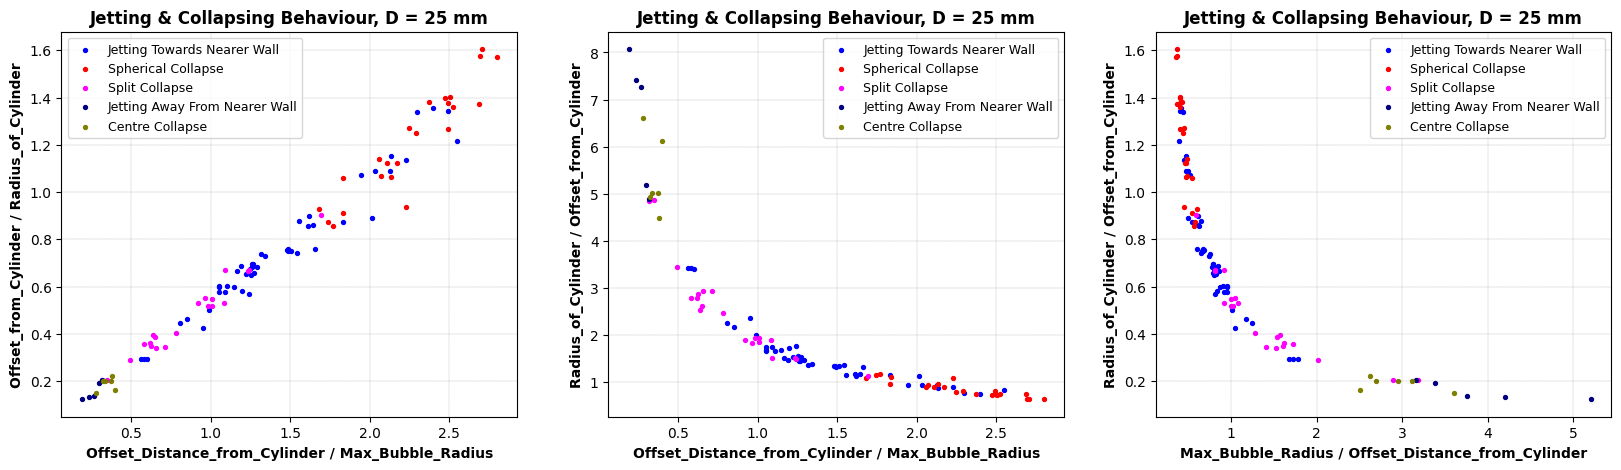

In [9]:
plt.figure(figsize = (20, 5))

plt.subplot(1,3,1)
plt.scatter(mm_25_jetting_towards["f'"], mm_25_jetting_towards["e'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(mm_25_spherical_collapse["f'"], mm_25_spherical_collapse["e'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(mm_25_split_collapse["f'"], mm_25_split_collapse["e'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(mm_25_jetting_away["f'"], mm_25_jetting_away["e'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter(mm_25_centre_collapse["f'"], mm_25_centre_collapse["e'"], color = 'olive', label = "Centre Collapse", s = 8)
plt.xlabel("Offset_Distance_from_Cylinder / Max_Bubble_Radius", fontweight = "bold"), plt.ylabel("Offset_from_Cylinder / Radius_of_Cylinder", fontweight = "bold")
plt.legend(fontsize = 9), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour, D = 25 mm', fontweight = "bold")

plt.subplot(1,3,2)
plt.scatter(mm_25_jetting_towards["f'"], 1/mm_25_jetting_towards["e'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(mm_25_spherical_collapse["f'"], 1/mm_25_spherical_collapse["e'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(mm_25_split_collapse["f'"], 1/mm_25_split_collapse["e'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(mm_25_jetting_away["f'"], 1/mm_25_jetting_away["e'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter(mm_25_centre_collapse["f'"], 1/mm_25_centre_collapse["e'"], color = 'olive', label = "Centre Collapse", s = 8)
plt.xlabel("Offset_Distance_from_Cylinder / Max_Bubble_Radius", fontweight = "bold"), plt.ylabel("Radius_of_Cylinder / Offset_from_Cylinder", fontweight = "bold")
plt.legend(fontsize = 9), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour, D = 25 mm', fontweight = "bold")

plt.subplot(1,3,3)
plt.scatter(1/mm_25_jetting_towards["f'"], mm_25_jetting_towards["e'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(1/mm_25_spherical_collapse["f'"], mm_25_spherical_collapse["e'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(1/mm_25_split_collapse["f'"],mm_25_split_collapse["e'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(1/mm_25_jetting_away["f'"], mm_25_jetting_away["e'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter(1/mm_25_centre_collapse["f'"], mm_25_centre_collapse["e'"], color = 'olive', label = "Centre Collapse", s = 8)
plt.xlabel("Max_Bubble_Radius / Offset_Distance_from_Cylinder", fontweight = "bold"), plt.ylabel("Radius_of_Cylinder / Offset_from_Cylinder", fontweight = "bold")
plt.legend(fontsize = 9), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour, D = 25 mm', fontweight = "bold")

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

# Data of 40 mm

In [10]:
mm_40_data = pd.read_excel(filepath, sheet_name='Diameter_40mm')
mm_40_data.head()

,Gap Width Theoretical (in mm),Gap Width Experimental (in mm),Offset ratio,Exp No.,Conversion Factor (in pixels/mm),Max Radius (in pixels),Max Radius (in mm),W',W'_Avg,Bubble Behaviour,Jet Direction,Mean Radius (in mm),Std. Deviation of Radius (in mm),Mean Gap Width Experimental (in mm),Std. Deviation Gap Width Experimental (in mm),Remarks
0,45.0,43.280,0.250,1.0,NaN,NaN,6.811,6.354427,6.185567,Jetting Towards Nearer Wall,Towards Solid Wall with High Velocity,6.727051,0.741206,47.083948,2.082903,NaN
1,NaN,43.086,NaN,2.0,NaN,NaN,7.280,5.918407,NaN,Jetting Towards Nearer Wall,Towards Solid Wall with High Velocity,NaN,NaN,NaN,NaN,NaN
2,NaN,45.690,NaN,3.0,NaN,NaN,7.271,6.283867,NaN,Jetting Towards Nearer Wall,Towards Solid Wall with High Velocity,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,47.231,0.125,1.0,NaN,NaN,7.474,6.319374,6.751023,Spherical Collapse,No flow towards Solid Wall,NaN,NaN,NaN,NaN,Significant amount of small bubble like struct...


In [11]:
required_data = mm_40_data[['Gap Width Experimental (in mm)', 'Offset ratio', "W'", 'Bubble Behaviour', "Max Radius (in mm)"]]
required_data = required_data.dropna(how='all')
required_data = required_data.fillna(method='ffill')
required_data["b"] = required_data["Gap Width Experimental (in mm)"]*required_data['Offset ratio']
required_data["b'"] = 2 * required_data["b"]/required_data["Gap Width Experimental (in mm)"]
required_data["r'"] = required_data["Max Radius (in mm)"]/20
required_data["s'"] = required_data["Gap Width Experimental (in mm)"] * required_data["Offset ratio"]/20
required_data["c'"] = required_data["b"]/required_data["Max Radius (in mm)"]
required_data["a'"] = required_data["Gap Width Experimental (in mm)"]/20
required_data["p'"] = ((required_data["Max Radius (in mm)"] * 20)**0.5) / required_data["Gap Width Experimental (in mm)"]
required_data["B"] = required_data["Gap Width Experimental (in mm)"]/2 - required_data["b"]
required_data["B'"] = 0.5 - required_data["b'"]
required_data["e'"] = required_data["B"] / 20
required_data["f'"] = required_data["B"] / required_data["Max Radius (in mm)"]
required_data.head()

,Gap Width Experimental (in mm),Offset ratio,W',Bubble Behaviour,Max Radius (in mm),b,b',r',s',c',a',p',B,B',e',f'
0,43.280,0.250,6.354427,Jetting Towards Nearer Wall,6.811,10.820000,0.50,0.34055,0.541000,1.588607,2.16400,0.269670,10.820000,0.00,0.541000,1.588607
1,43.086,0.250,5.918407,Jetting Towards Nearer Wall,7.280,10.771500,0.50,0.36400,0.538575,1.479602,2.15430,0.280056,10.771500,0.00,0.538575,1.479602
2,45.690,0.250,6.283867,Jetting Towards Nearer Wall,7.271,11.422500,0.50,0.36355,0.571125,1.570967,2.28450,0.263931,11.422500,0.00,0.571125,1.570967
4,47.231,0.125,6.319374,Spherical Collapse,7.474,5.903875,0.25,0.37370,0.295194,0.789922,2.36155,0.258860,17.711625,0.25,0.885581,2.369765
5,46.108,0.125,6.779591,Spherical Collapse,6.801,5.763500,0.25,0.34005,0.288175,0.847449,2.30540,0.252944,17.290500,0.25,0.864525,2.542347


In [12]:
mm_40_spherical_collapse = (required_data[required_data['Bubble Behaviour'] == 'Spherical Collapse']).sort_values(by = "W'", ascending = 0).iloc[1:, :]
mm_40_centre_collapse = (required_data[required_data['Bubble Behaviour'] == 'Centre Collapse']).sort_values(by = "b", ascending = 0)
mm_40_split_after_collapse = (required_data[required_data['Bubble Behaviour'] == 'Split After Collapse']).sort_values(by = "b", ascending = 0)
mm_40_split_collapse = (required_data[required_data['Bubble Behaviour'] == 'Split Collapse']).sort_values(by = "b", ascending = 0)
mm_40_jetting_towards = (required_data[required_data['Bubble Behaviour'] == 'Jetting Towards Nearer Wall']).sort_values(by = "b", ascending = 0)
mm_40_jetting_away = (required_data[required_data['Bubble Behaviour'] == 'Jetting Away From Nearer Wall']).sort_values(by = "b", ascending = 0)

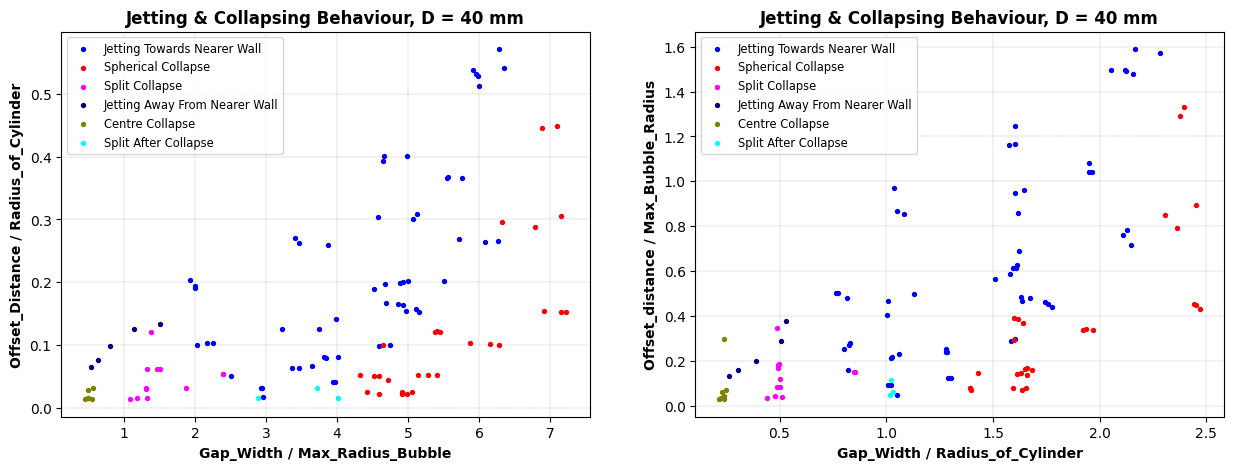

In [13]:
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
plt.scatter(mm_40_jetting_towards["W'"], mm_40_jetting_towards["s'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(mm_40_spherical_collapse["W'"], mm_40_spherical_collapse["s'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(mm_40_split_collapse["W'"], mm_40_split_collapse["s'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(mm_40_jetting_away["W'"], mm_40_jetting_away["s'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter(mm_40_centre_collapse["W'"], mm_40_centre_collapse["s'"], color = 'olive', label = "Centre Collapse", s = 8)
plt.scatter(mm_40_split_after_collapse["W'"], mm_40_split_after_collapse["s'"], color = 'cyan', label = "Split After Collapse", s = 8)
plt.ylabel("Offset_Distance / Radius_of_Cylinder", fontweight = "bold"), plt.xlabel("Gap_Width / Max_Radius_Bubble", fontweight = "bold")
plt.legend(fontsize = 8.3, loc = "upper left"), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour, D = 40 mm', fontweight = "bold")
#plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/W'-s' 40 mm.png")

plt.subplot(1,2,2)
plt.scatter(y = mm_40_jetting_towards["c'"], x = mm_40_jetting_towards["a'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(y = mm_40_spherical_collapse["c'"], x = mm_40_spherical_collapse["a'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(y = mm_40_split_collapse["c'"], x = mm_40_split_collapse["a'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(y = mm_40_jetting_away["c'"], x = mm_40_jetting_away["a'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter(y = mm_40_centre_collapse["c'"], x = mm_40_centre_collapse["a'"], color = 'olive', label = "Centre Collapse", s = 8)
plt.scatter(y = mm_40_split_after_collapse["c'"], x = mm_40_split_after_collapse["a'"], color = 'cyan', label = "Split After Collapse", s = 8)
plt.xlabel("Gap_Width / Radius_of_Cylinder", fontweight = "bold"), plt.ylabel("Offset_distance / Max_Bubble_Radius", fontweight = "bold")
plt.legend(fontsize = 8.3, loc = "upper left"), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour, D = 40 mm', fontweight = "bold")

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

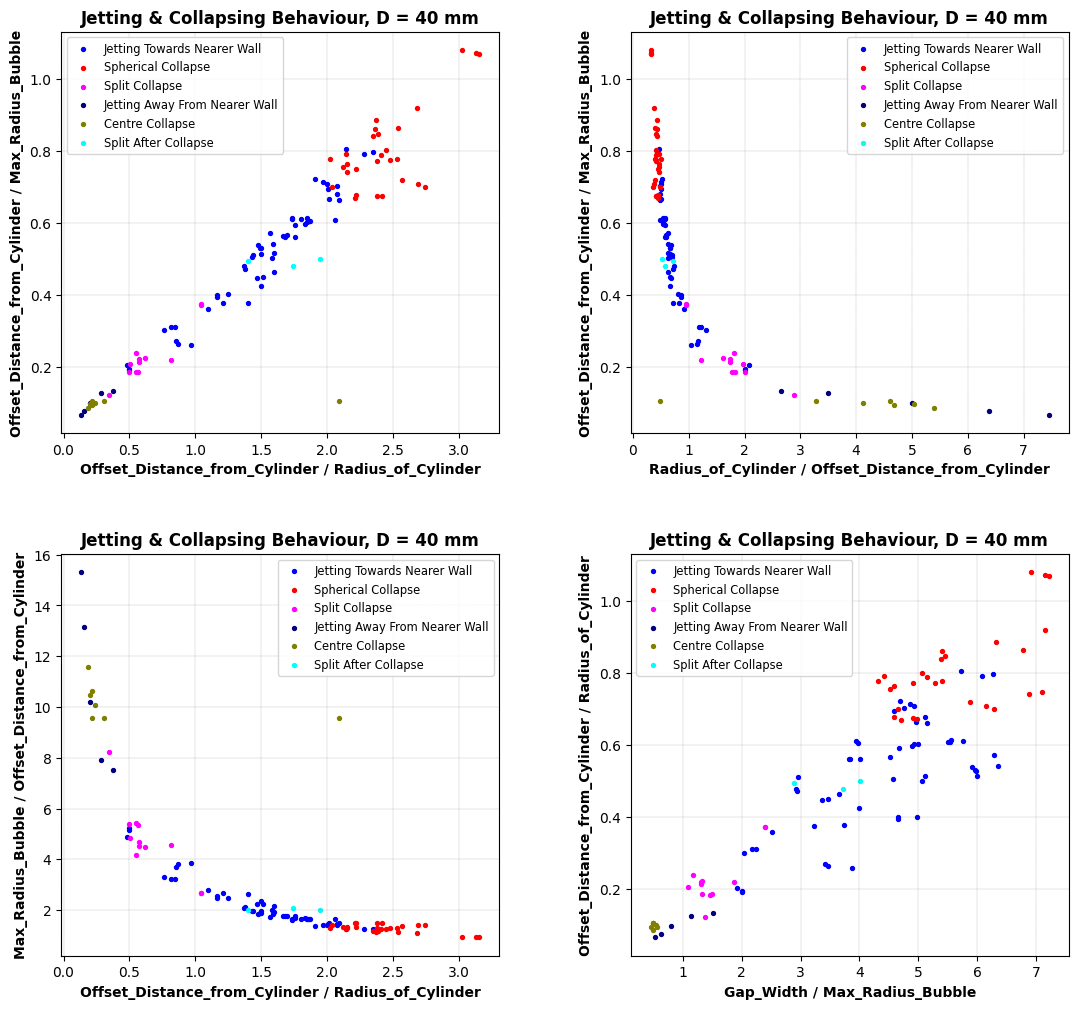

In [14]:
plt.figure(figsize = (13, 12))

plt.subplot(2,2,1)
plt.scatter(mm_40_jetting_towards["f'"], mm_40_jetting_towards["e'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(mm_40_spherical_collapse["f'"], mm_40_spherical_collapse["e'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(mm_40_split_collapse["f'"], mm_40_split_collapse["e'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(mm_40_jetting_away["f'"], mm_40_jetting_away["e'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter(mm_40_centre_collapse["f'"], mm_40_centre_collapse["e'"], color = 'olive', label = "Centre Collapse", s = 8)
plt.scatter(mm_40_split_after_collapse["f'"], mm_40_split_after_collapse["e'"], color = 'cyan', label = "Split After Collapse", s = 8)
plt.ylabel("Offset_Distance_from_Cylinder / Max_Radius_Bubble", fontweight = "bold"), plt.xlabel("Offset_Distance_from_Cylinder / Radius_of_Cylinder", fontweight = "bold")
plt.legend(fontsize = 8.3, loc = "upper left"), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour, D = 40 mm', fontweight = "bold")

plt.subplot(2,2,2)
plt.scatter(1/mm_40_jetting_towards["f'"], mm_40_jetting_towards["e'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(1/mm_40_spherical_collapse["f'"], mm_40_spherical_collapse["e'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(1/mm_40_split_collapse["f'"], mm_40_split_collapse["e'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(1/mm_40_jetting_away["f'"], mm_40_jetting_away["e'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter(1/mm_40_centre_collapse["f'"], mm_40_centre_collapse["e'"], color = 'olive', label = "Centre Collapse", s = 8)
plt.scatter(1/mm_40_split_after_collapse["f'"], mm_40_split_after_collapse["e'"], color = 'cyan', label = "Split After Collapse", s = 8)
plt.ylabel("Offset_Distance_from_Cylinder / Max_Radius_Bubble", fontweight = "bold"), plt.xlabel("Radius_of_Cylinder / Offset_Distance_from_Cylinder", fontweight = "bold")
plt.legend(fontsize = 8.3, loc = "upper right"), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour, D = 40 mm', fontweight = "bold")

plt.subplot(2,2,3)
plt.scatter(mm_40_jetting_towards["f'"], 1/mm_40_jetting_towards["e'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(mm_40_spherical_collapse["f'"], 1/mm_40_spherical_collapse["e'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(mm_40_split_collapse["f'"], 1/mm_40_split_collapse["e'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(mm_40_jetting_away["f'"], 1/mm_40_jetting_away["e'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter(mm_40_centre_collapse["f'"], 1/mm_40_centre_collapse["e'"], color = 'olive', label = "Centre Collapse", s = 8)
plt.scatter(mm_40_split_after_collapse["f'"], 1/mm_40_split_after_collapse["e'"], color = 'cyan', label = "Split After Collapse", s = 8)
plt.ylabel("Max_Radius_Bubble / Offset_Distance_from_Cylinder", fontweight = "bold"), plt.xlabel("Offset_Distance_from_Cylinder / Radius_of_Cylinder", fontweight = "bold")
plt.legend(fontsize = 8.3, loc = "upper right"), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour, D = 40 mm', fontweight = "bold")

plt.subplot(2,2,4)
plt.scatter(mm_40_jetting_towards["W'"], mm_40_jetting_towards["e'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(mm_40_spherical_collapse["W'"], mm_40_spherical_collapse["e'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(mm_40_split_collapse["W'"], mm_40_split_collapse["e'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(mm_40_jetting_away["W'"], mm_40_jetting_away["e'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter(mm_40_centre_collapse["W'"], mm_40_centre_collapse["e'"], color = 'olive', label = "Centre Collapse", s = 8)
plt.scatter(mm_40_split_after_collapse["W'"], mm_40_split_after_collapse["e'"], color = 'cyan', label = "Split After Collapse", s = 8)
plt.ylabel("Offset_Distance_from_Cylinder / Radius_of_Cylinder", fontweight = "bold"), plt.xlabel("Gap_Width / Max_Radius_Bubble", fontweight = "bold")
plt.legend(fontsize = 8.3, loc = "upper left"), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour, D = 40 mm', fontweight = "bold")

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

# Data for 50 mm

In [15]:
mm_50_data = pd.read_excel(filepath, sheet_name='Diameter_50mm')
mm_50_data.head()

,Gap Width Theoretical (in mm),Gap Width Experimental (in mm),Offset from Centre,Exp No.,Max Radius (in pixels),Conversion Factor (in pixels/mm),Max. Radius (in mm),W',W' Avg.,Bubble Behaviour,Jet_Direction,Mean Radius (in mm),Std. Deviation of Radius (in mm),Mean Gap Width Experimental (in mm),Std. Deviation Gap Width Experimental (in mm),Remarks
0,25.0,24.514,0.06250,1.0,57.0,8.3014,6.866312,3.570185,3.518056,Split After Collapse,Towards nearer wall with low velocity,6.811829,0.331887,24.179226,1.049858,"Dumpbell-like shape, larger volume towards nea..."
1,NaN,24.828,NaN,2.0,59.0,8.2167,7.180498,3.457699,NaN,Split After Collapse,Towards nearer wall with low velocity,NaN,NaN,NaN,NaN,"Dumpbell-like shape, larger volume towards nea..."
2,NaN,24.562,NaN,3.0,57.0,8.1833,6.965405,3.526284,NaN,Split After Collapse,Towards nearer wall with low velocity,NaN,NaN,NaN,NaN,"Dumpbell-like shape, larger volume towards nea..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,26.574,0.03125,1.0,52.0,7.6015,6.840755,3.884659,3.645259,Spherical Collapse,Towards nearer solid wall with low velocity,NaN,NaN,NaN,NaN,NaN


In [16]:
required_data = mm_50_data[['Gap Width Experimental (in mm)', 'Offset from Centre', "W'", 'Bubble Behaviour', "Max. Radius (in mm)"]]
required_data = required_data.dropna(how='all')
required_data = required_data.fillna(method='ffill')
required_data["b"] = required_data["Gap Width Experimental (in mm)"]*required_data['Offset from Centre']
required_data["b'"] = 2 * required_data["b"]/required_data["Gap Width Experimental (in mm)"]
required_data["r'"] = required_data["Max. Radius (in mm)"]/25
required_data["s'"] = required_data["Gap Width Experimental (in mm)"] * required_data["Offset from Centre"]/25
required_data["c'"] = required_data["b"]/required_data["Max. Radius (in mm)"]
required_data["a'"] = required_data["Gap Width Experimental (in mm)"]/25
required_data["p'"] = ((required_data["Max. Radius (in mm)"] * 25)**0.5) / required_data["Gap Width Experimental (in mm)"]
required_data["B"] = required_data["Gap Width Experimental (in mm)"]/2 - required_data["b"]
required_data["B'"] = 0.5 - required_data["b'"]
required_data["e'"] = required_data["B"] / 25
required_data["f'"] = required_data["B"] / required_data["Max. Radius (in mm)"]
required_data.head()

,Gap Width Experimental (in mm),Offset from Centre,W',Bubble Behaviour,Max. Radius (in mm),b,b',r',s',c',a',p',B,B',e',f'
0,24.514,0.06250,3.570185,Split After Collapse,6.866312,1.532125,0.1250,0.274652,0.061285,0.223137,0.98056,0.534463,10.724875,0.3750,0.428995,1.561956
1,24.828,0.06250,3.457699,Split After Collapse,7.180498,1.551750,0.1250,0.287220,0.062070,0.216106,0.99312,0.539642,10.862250,0.3750,0.434490,1.512743
2,24.562,0.06250,3.526284,Split After Collapse,6.965405,1.535125,0.1250,0.278616,0.061405,0.220393,0.98248,0.537254,10.745875,0.3750,0.429835,1.542749
4,26.574,0.03125,3.884659,Spherical Collapse,6.840755,0.830438,0.0625,0.273630,0.033218,0.121396,1.06296,0.492113,12.456563,0.4375,0.498262,1.820934
5,24.106,0.03125,3.568633,Spherical Collapse,6.754967,0.753313,0.0625,0.270199,0.030133,0.111520,0.96424,0.539084,11.299688,0.4375,0.451988,1.672797


In [17]:
mm_50_spherical_collapse = (required_data[required_data['Bubble Behaviour'] == 'Spherical Collapse']).sort_values(by = "W'", ascending = 1).iloc[3:, :]
mm_50_split_after_collapse = (required_data[required_data['Bubble Behaviour'] == 'Split After Collapse']).sort_values(by = "b", ascending = 0)
mm_50_split_collapse = (required_data[required_data['Bubble Behaviour'] == 'Split Collapse']).sort_values(by = "b", ascending = 0)
mm_50_jetting_towards = (required_data[required_data['Bubble Behaviour'] == 'Jetting Towards Nearer Wall']).sort_values(by = "b", ascending = 0)
mm_50_jetting_away = (required_data[required_data['Bubble Behaviour'] == 'Jetting Away From Nearer Wall']).sort_values(by = "b", ascending = 0)

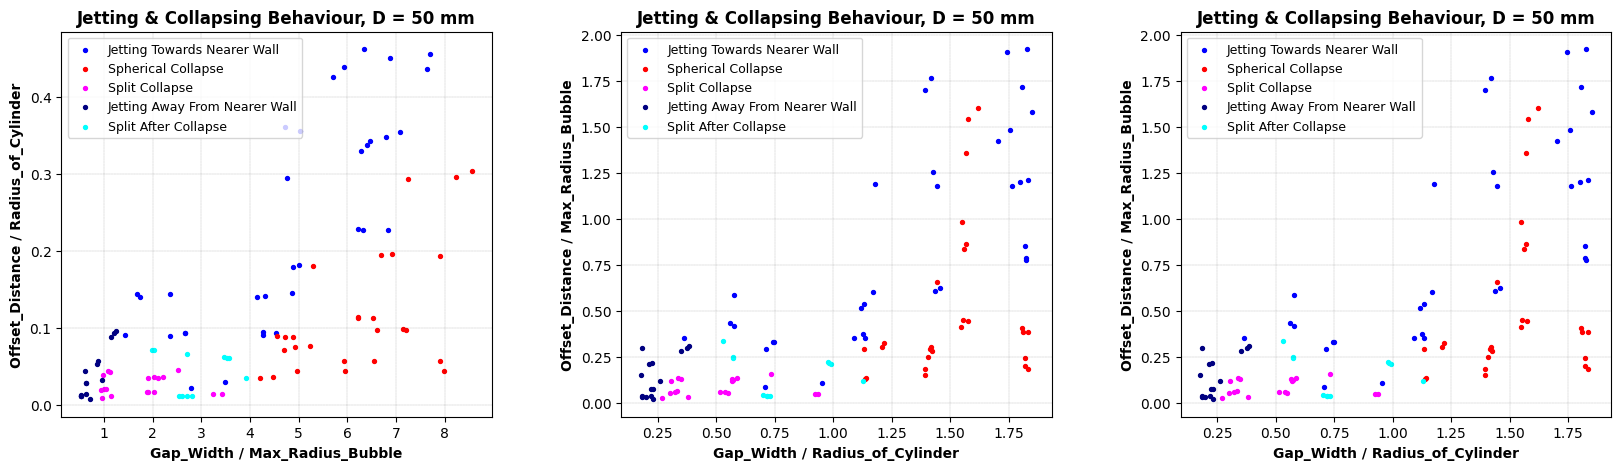

In [18]:
plt.figure(figsize = (20, 5))

plt.subplot(1,3,1)
plt.scatter(mm_50_jetting_towards["W'"], mm_50_jetting_towards["s'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(mm_50_spherical_collapse["W'"], mm_50_spherical_collapse["s'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(mm_50_split_collapse["W'"], mm_50_split_collapse["s'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(mm_50_jetting_away["W'"], mm_50_jetting_away["s'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter( mm_50_split_after_collapse["W'"], mm_50_split_after_collapse["s'"], color = 'cyan', label = "Split After Collapse", s = 8)
plt.ylabel("Offset_Distance / Radius_of_Cylinder", fontweight = "bold"), plt.xlabel("Gap_Width / Max_Radius_Bubble", fontweight = "bold")
plt.legend(fontsize = 9, loc = "upper left"), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour, D = 50 mm', fontweight = "bold")
#plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/W'-b 50 mm.png")

plt.subplot(1,3,2)
plt.scatter(y = mm_50_jetting_towards["c'"], x = mm_50_jetting_towards["a'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(y = mm_50_spherical_collapse["c'"], x = mm_50_spherical_collapse["a'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(y = mm_50_split_collapse["c'"], x = mm_50_split_collapse["a'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(y = mm_50_jetting_away["c'"], x = mm_50_jetting_away["a'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter(y = mm_50_split_after_collapse["c'"], x = mm_50_split_after_collapse["a'"], color = 'cyan', label = "Split After Collapse", s = 8)
plt.xlabel("Gap_Width / Radius_of_Cylinder", fontweight = "bold"), plt.ylabel("Offset_Distance / Max_Radius_Bubble", fontweight = "bold")
plt.legend(fontsize = 9, loc = "upper left"), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour, D = 50 mm', fontweight = "bold")

plt.subplot(1,3,3)
plt.scatter(mm_50_jetting_towards["a'"], mm_50_jetting_towards["c'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(mm_50_spherical_collapse["a'"], mm_50_spherical_collapse["c'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(mm_50_split_collapse["a'"], mm_50_split_collapse["c'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(mm_50_jetting_away["a'"], mm_50_jetting_away["c'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter( mm_50_split_after_collapse["a'"], mm_50_split_after_collapse["c'"], color = 'cyan', label = "Split After Collapse", s = 8)
plt.ylabel("Offset_Distance / Max_Radius_Bubble", fontweight = "bold"), plt.xlabel("Gap_Width / Radius_of_Cylinder", fontweight = "bold")
plt.legend(fontsize = 9, loc = "upper left"), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour, D = 50 mm', fontweight = "bold")

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

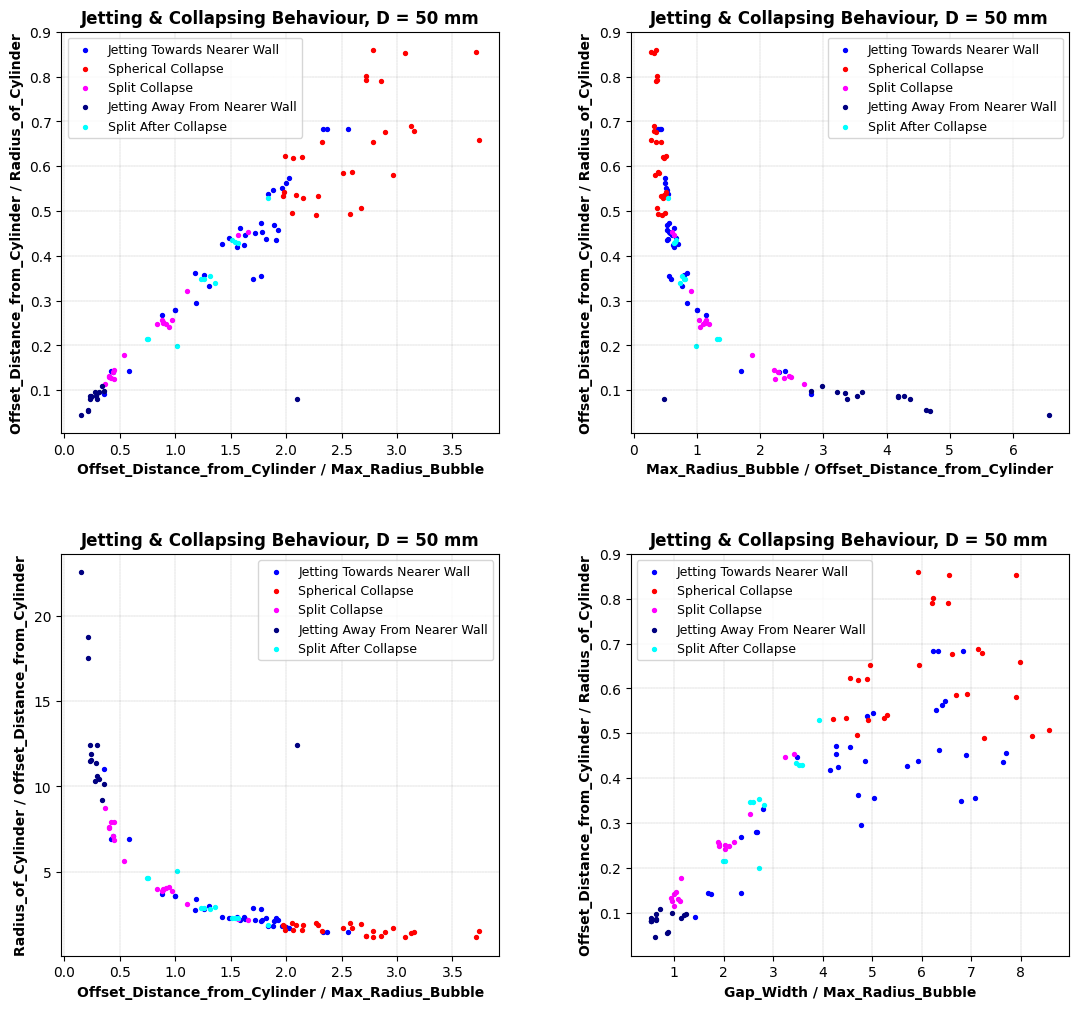

In [19]:
plt.figure(figsize = (13, 12))

plt.subplot(2,2,1)
plt.scatter(mm_50_jetting_towards["f'"], mm_50_jetting_towards["e'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(mm_50_spherical_collapse["f'"], mm_50_spherical_collapse["e'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(mm_50_split_collapse["f'"], mm_50_split_collapse["e'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(mm_50_jetting_away["f'"], mm_50_jetting_away["e'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter( mm_50_split_after_collapse["f'"], mm_50_split_after_collapse["e'"], color = 'cyan', label = "Split After Collapse", s = 8)
plt.ylabel("Offset_Distance_from_Cylinder / Radius_of_Cylinder", fontweight = "bold"), plt.xlabel("Offset_Distance_from_Cylinder / Max_Radius_Bubble", fontweight = "bold")
plt.legend(fontsize = 9, loc = "upper left"), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour, D = 50 mm', fontweight = "bold")

plt.subplot(2,2,2)
plt.scatter(1/mm_50_jetting_towards["f'"], mm_50_jetting_towards["e'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(1/mm_50_spherical_collapse["f'"], mm_50_spherical_collapse["e'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(1/mm_50_split_collapse["f'"], mm_50_split_collapse["e'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(1/mm_50_jetting_away["f'"], mm_50_jetting_away["e'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter(1/mm_50_split_after_collapse["f'"], mm_50_split_after_collapse["e'"], color = 'cyan', label = "Split After Collapse", s = 8)
plt.ylabel("Offset_Distance_from_Cylinder / Radius_of_Cylinder", fontweight = "bold"), plt.xlabel("Max_Radius_Bubble / Offset_Distance_from_Cylinder", fontweight = "bold")
plt.legend(fontsize = 9, loc = "upper right"), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour, D = 50 mm', fontweight = "bold")

plt.subplot(2,2,3)
plt.scatter(mm_50_jetting_towards["f'"], 1/mm_50_jetting_towards["e'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(mm_50_spherical_collapse["f'"], 1/mm_50_spherical_collapse["e'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(mm_50_split_collapse["f'"], 1/mm_50_split_collapse["e'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(mm_50_jetting_away["f'"], 1/mm_50_jetting_away["e'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter( mm_50_split_after_collapse["f'"], 1/mm_50_split_after_collapse["e'"], color = 'cyan', label = "Split After Collapse", s = 8)
plt.ylabel("Radius_of_Cylinder / Offset_Distance_from_Cylinder", fontweight = "bold"), plt.xlabel("Offset_Distance_from_Cylinder / Max_Radius_Bubble", fontweight = "bold")
plt.legend(fontsize = 9, loc = "upper right"), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour, D = 50 mm', fontweight = "bold")

plt.subplot(2,2,4)
plt.scatter(mm_50_jetting_towards["W'"], mm_50_jetting_towards["e'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(mm_50_spherical_collapse["W'"], mm_50_spherical_collapse["e'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(mm_50_split_collapse["W'"], mm_50_split_collapse["e'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(mm_50_jetting_away["W'"], mm_50_jetting_away["e'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter( mm_50_split_after_collapse["W'"], mm_50_split_after_collapse["e'"], color = 'cyan', label = "Split After Collapse", s = 8)
plt.ylabel("Offset_Distance_from_Cylinder / Radius_of_Cylinder", fontweight = "bold"), plt.xlabel("Gap_Width / Max_Radius_Bubble", fontweight = "bold")
plt.legend(fontsize = 9, loc = "upper left"), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour, D = 50 mm', fontweight = "bold")

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

# **Plot For all Data**

<ipython-input-29-165199794e57>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


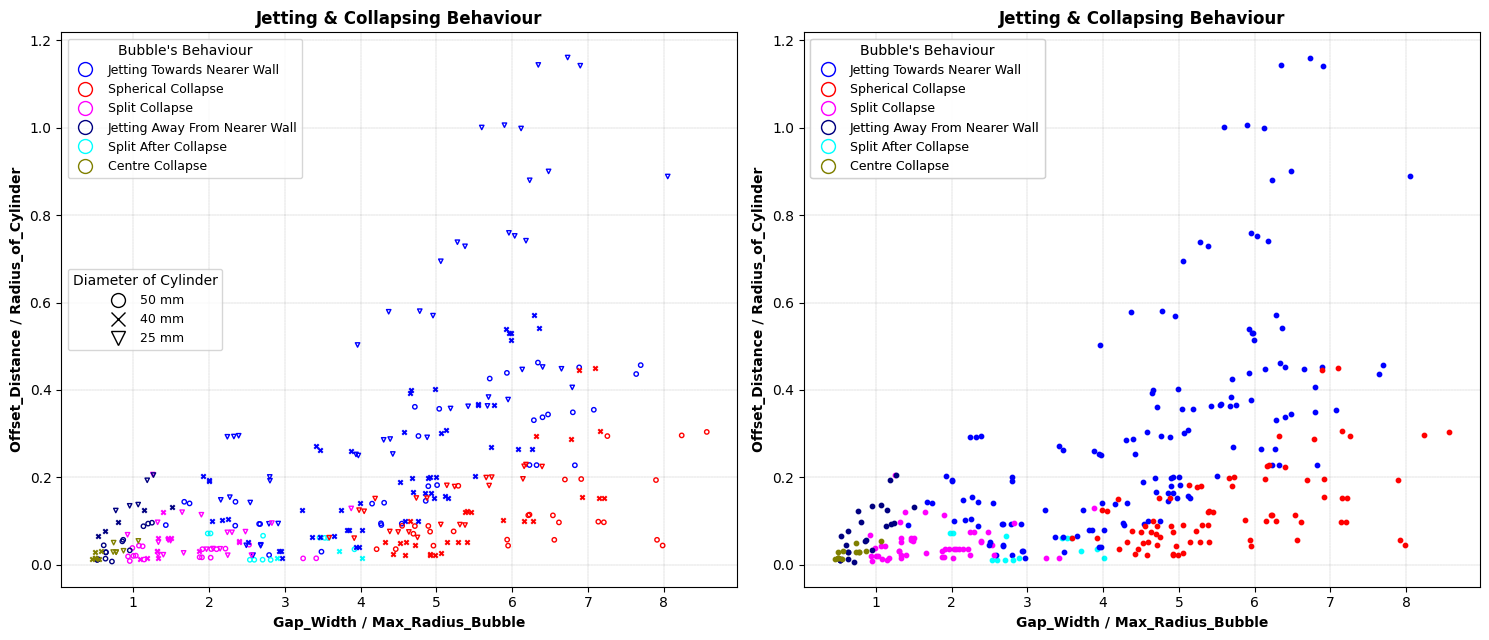

In [29]:
plt.subplots(figsize=(15, 6.5))

plt.subplot(1, 2, 1)
plt.scatter(mm_50_jetting_towards["W'"], mm_50_jetting_towards["s'"], edgecolor='blue', facecolors='none', label="Jetting Towards Nearer Wall", s=10, marker="o")
plt.scatter(mm_50_spherical_collapse["W'"], mm_50_spherical_collapse["s'"], edgecolor='red', facecolors='none', label="Spherical Collapse", s=10, marker="o")
plt.scatter(mm_50_split_collapse["W'"], mm_50_split_collapse["s'"], edgecolor='fuchsia', facecolors='none', label="Split Collapse", s=10, marker="o")
plt.scatter(mm_50_jetting_away["W'"], mm_50_jetting_away["s'"], edgecolor='navy', facecolors='none', label="Jetting Away From Nearer Wall", s=10, marker="o")
plt.scatter(mm_50_split_after_collapse["W'"], mm_50_split_after_collapse["s'"], edgecolor='cyan', facecolors='none', label="Split After Collapse", s=10, marker="o")

plt.scatter(mm_40_jetting_towards["W'"], mm_40_jetting_towards["s'"], color='blue', label="Jetting Towards Nearer Wall", s=10, marker="x")
plt.scatter(mm_40_spherical_collapse["W'"], mm_40_spherical_collapse["s'"], color='red', label="Spherical Collapse", s=10, marker="x")
plt.scatter(mm_40_split_collapse["W'"], mm_40_split_collapse["s'"], color='fuchsia', label="Split Collapse", s=10, marker="x")
plt.scatter(mm_40_jetting_away["W'"], mm_40_jetting_away["s'"], color='navy', label="Jetting Away From Nearer Wall", s=10, marker="x")
plt.scatter(mm_40_centre_collapse["W'"], mm_40_centre_collapse["s'"], color='olive', label="Centre Collapse", s=10, marker="x")
plt.scatter(mm_40_split_after_collapse["W'"], mm_40_split_after_collapse["s'"], color='cyan', label="Split After Collapse", s=10, marker="x")

plt.scatter(mm_25_jetting_towards["W'"], mm_25_jetting_towards["s'"], edgecolor='blue', facecolors='none', label="Jetting Towards Nearer Wall", s=10, marker="v")
plt.scatter(mm_25_spherical_collapse["W'"], mm_25_spherical_collapse["s'"], edgecolor='red', facecolors='none', label="Spherical Collapse", s=10, marker="v")
plt.scatter(mm_25_split_collapse["W'"], mm_25_split_collapse["s'"], edgecolor='fuchsia', facecolors='none', label="Split Collapse", s=10, marker="v")
plt.scatter(mm_25_jetting_away["W'"], mm_25_jetting_away["s'"], edgecolor='navy', facecolors='none', label="Jetting Away From Nearer Wall", s=10, marker="v")
plt.scatter(mm_25_centre_collapse["W'"], mm_25_centre_collapse["s'"], edgecolor='olive', facecolors='none', label="Centre Collapse", s=10, marker="v")

plt.ylabel("Offset_Distance / Radius_of_Cylinder", fontweight="bold")
plt.xlabel("Gap_Width / Max_Radius_Bubble", fontweight="bold")

colors = {'blue': 'Jetting Towards Nearer Wall', 'red': 'Spherical Collapse', 'fuchsia': 'Split Collapse', 'navy': 'Jetting Away From Nearer Wall', 'cyan': 'Split After Collapse', 'olive': 'Centre Collapse'}
markers = {'o': "50 mm", 'x': "40 mm", 'v': "25 mm"}

color_handles = [Line2D([0], [0], marker='o', color='w', markeredgecolor=color, markerfacecolor='none', markersize=10, label=label) for color, label in colors.items()]
marker_handles = [Line2D([0], [0], marker=marker, color='w', markeredgecolor='k', markerfacecolor='none', markersize=10, label=label) for marker, label in markers.items()]

legend1 = plt.legend(handles=color_handles, title="Bubble's Behaviour", fontsize=9, loc='upper left')
legend2 = plt.legend(handles=marker_handles, title="Diameter of Cylinder", fontsize=9, loc='center left')
plt.gca().add_artist(legend1)

plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour', fontweight="bold")
#plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/All Data Plot (with Cylinder Marker)")



# Next Plot
plt.subplot(1,2,2)
plt.scatter(mm_50_jetting_towards["W'"], mm_50_jetting_towards["s'"], label="Jetting Towards Nearer Wall", s=10, color = "blue")
plt.scatter(mm_50_spherical_collapse["W'"], mm_50_spherical_collapse["s'"], color='red', label="Spherical Collapse", s=10)
plt.scatter(mm_50_split_collapse["W'"], mm_50_split_collapse["s'"], color='fuchsia', label="Split Collapse", s=10)
plt.scatter(mm_50_jetting_away["W'"], mm_50_jetting_away["s'"], color='navy', label="Jetting Away From Nearer Wall", s=10)
plt.scatter(mm_50_split_after_collapse["W'"], mm_50_split_after_collapse["s'"], color='cyan', label="Split After Collapse", s=10)

plt.scatter(mm_40_jetting_towards["W'"], mm_40_jetting_towards["s'"], color='blue', label="Jetting Towards Nearer Wall", s=10)
plt.scatter(mm_40_spherical_collapse["W'"], mm_40_spherical_collapse["s'"], color='red', label="Spherical Collapse", s=10)
plt.scatter(mm_40_split_collapse["W'"], mm_40_split_collapse["s'"], color='fuchsia', label="Split Collapse", s=10)
plt.scatter(mm_40_jetting_away["W'"], mm_40_jetting_away["s'"], color='navy', label="Jetting Away From Nearer Wall", s=10)
plt.scatter(mm_40_centre_collapse["W'"], mm_40_centre_collapse["s'"], color='olive', label="Centre Collapse", s=10)
plt.scatter(mm_40_split_after_collapse["W'"], mm_40_split_after_collapse["s'"], color='cyan', label="Split After Collapse", s=10)

plt.scatter(mm_25_jetting_towards["W'"], mm_25_jetting_towards["s'"], color='blue', label="Jetting Towards Nearer Wall", s=10)
plt.scatter(mm_25_spherical_collapse["W'"], mm_25_spherical_collapse["s'"], color='red', label="Spherical Collapse", s=10)
plt.scatter(mm_25_split_collapse["W'"], mm_25_split_collapse["s'"], color='fuchsia', label="Split Collapse", s=10)
plt.scatter(mm_25_jetting_away["W'"], mm_25_jetting_away["s'"], color='navy', label="Jetting Away From Nearer Wall", s=10)
plt.scatter(mm_25_centre_collapse["W'"], mm_25_centre_collapse["s'"], color='olive', label="Centre Collapse", s=10)

plt.ylabel("Offset_Distance / Radius_of_Cylinder", fontweight="bold")
plt.xlabel("Gap_Width / Max_Radius_Bubble", fontweight="bold")

colors = {'blue': 'Jetting Towards Nearer Wall', 'red': 'Spherical Collapse', 'fuchsia': 'Split Collapse', 'navy': 'Jetting Away From Nearer Wall', 'cyan': 'Split After Collapse', 'olive': 'Centre Collapse'}
color_handles = [Line2D([0], [0], marker='o', color='w', markeredgecolor=color, markerfacecolor='none', markersize=10, label=label) for color, label in colors.items()]
legend1 = plt.legend(handles=color_handles, title="Bubble's Behaviour", fontsize=9, loc='upper left')
plt.gca().add_artist(legend1)

plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour', fontweight="bold")
#plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/All Data Plot")

plt.tight_layout()
plt.show()

<ipython-input-21-c2fa8fe93708>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


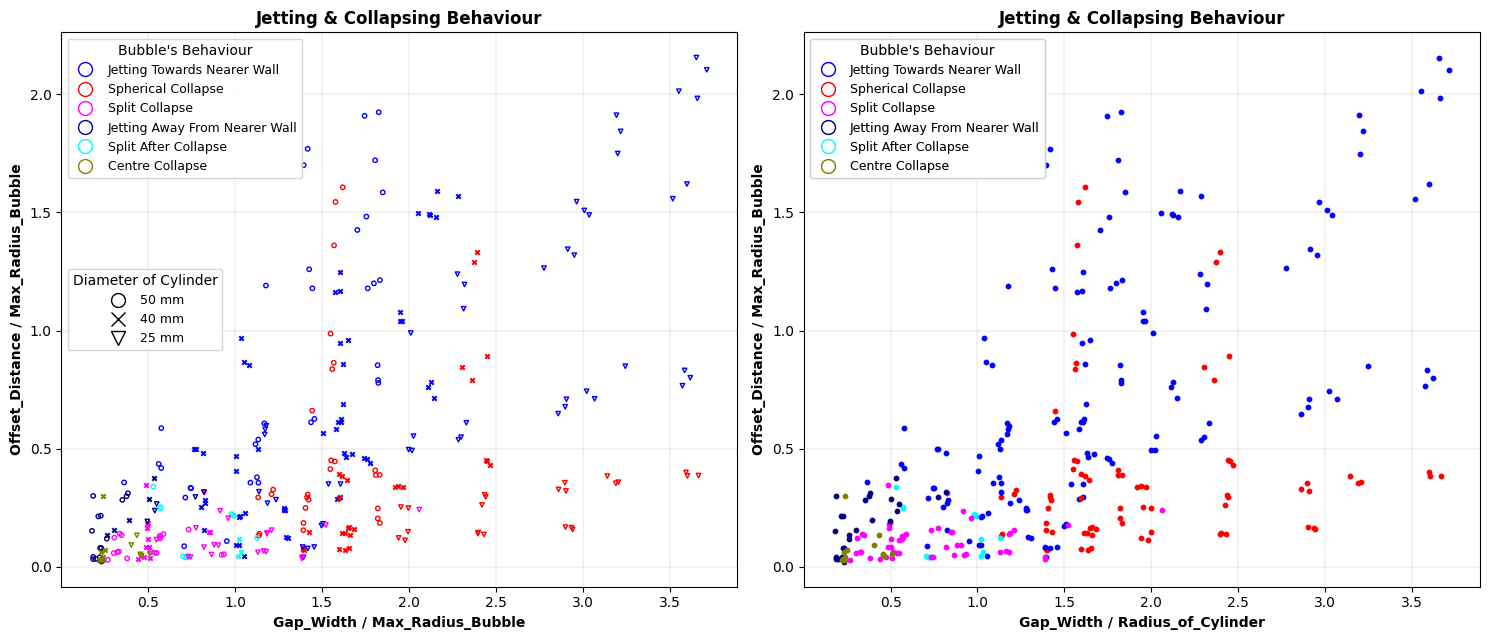

In [21]:
plt.subplots(figsize=(15, 6.5))

plt.subplot(1, 2, 1)
plt.scatter(mm_50_jetting_towards["a'"], mm_50_jetting_towards["c'"], edgecolor='blue', facecolors='none', label="Jetting Towards Nearer Wall", s=10, marker="o")
plt.scatter(mm_50_spherical_collapse["a'"], mm_50_spherical_collapse["c'"], edgecolor='red', facecolors='none', label="Spherical Collapse", s=10, marker="o")
plt.scatter(mm_50_split_collapse["a'"], mm_50_split_collapse["c'"], edgecolor='fuchsia', facecolors='none', label="Split Collapse", s=10, marker="o")
plt.scatter(mm_50_jetting_away["a'"], mm_50_jetting_away["c'"], edgecolor='navy', facecolors='none', label="Jetting Away From Nearer Wall", s=10, marker="o")
plt.scatter(mm_50_split_after_collapse["a'"], mm_50_split_after_collapse["c'"], edgecolor='cyan', facecolors='none', label="Split After Collapse", s=10, marker="o")

plt.scatter(mm_40_jetting_towards["a'"], mm_40_jetting_towards["c'"], color='blue', label="Jetting Towards Nearer Wall", s=10, marker="x")
plt.scatter(mm_40_spherical_collapse["a'"], mm_40_spherical_collapse["c'"], color='red', label="Spherical Collapse", s=10, marker="x")
plt.scatter(mm_40_split_collapse["a'"], mm_40_split_collapse["c'"], color='fuchsia', label="Split Collapse", s=10, marker="x")
plt.scatter(mm_40_jetting_away["a'"], mm_40_jetting_away["c'"], color='navy', label="Jetting Away From Nearer Wall", s=10, marker="x")
plt.scatter(mm_40_centre_collapse["a'"], mm_40_centre_collapse["c'"], color='olive', label="Centre Collapse", s=10, marker="x")
plt.scatter(mm_40_split_after_collapse["a'"], mm_40_split_after_collapse["c'"], color='cyan', label="Split After Collapse", s=10, marker="x")

plt.scatter(mm_25_jetting_towards["a'"], mm_25_jetting_towards["c'"], edgecolor='blue', facecolors='none', label="Jetting Towards Nearer Wall", s=10, marker="v")
plt.scatter(mm_25_spherical_collapse["a'"], mm_25_spherical_collapse["c'"], edgecolor='red', facecolors='none', label="Spherical Collapse", s=10, marker="v")
plt.scatter(mm_25_split_collapse["a'"], mm_25_split_collapse["c'"], edgecolor='fuchsia', facecolors='none', label="Split Collapse", s=10, marker="v")
plt.scatter(mm_25_jetting_away["a'"], mm_25_jetting_away["c'"], edgecolor='navy', facecolors='none', label="Jetting Away From Nearer Wall", s=10, marker="v")
plt.scatter(mm_25_centre_collapse["a'"], mm_25_centre_collapse["c'"], edgecolor='olive', facecolors='none', label="Centre Collapse", s=10, marker="v")

plt.ylabel("Offset_Distance / Max_Radius_Bubble", fontweight="bold")
plt.xlabel("Gap_Width / Max_Radius_Bubble", fontweight="bold")

colors = {'blue': 'Jetting Towards Nearer Wall', 'red': 'Spherical Collapse', 'fuchsia': 'Split Collapse', 'navy': 'Jetting Away From Nearer Wall', 'cyan': 'Split After Collapse', 'olive': 'Centre Collapse'}
markers = {'o': "50 mm", 'x': "40 mm", 'v': "25 mm"}

color_handles = [Line2D([0], [0], marker='o', color='w', markeredgecolor=color, markerfacecolor='none', markersize=10, label=label) for color, label in colors.items()]
marker_handles = [Line2D([0], [0], marker=marker, color='w', markeredgecolor='k', markerfacecolor='none', markersize=10, label=label) for marker, label in markers.items()]

legend1 = plt.legend(handles=color_handles, title="Bubble's Behaviour", fontsize=9, loc='upper left')
legend2 = plt.legend(handles=marker_handles, title="Diameter of Cylinder", fontsize=9, loc='center left')
plt.gca().add_artist(legend1)

plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour', fontweight="bold")
#plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/All Data Plot (with Cylinder Marker)")



# Next Plot
plt.subplot(1,2,2)
plt.scatter(mm_50_jetting_towards["a'"], mm_50_jetting_towards["c'"], label="Jetting Towards Nearer Wall", s=10, color = "blue")
plt.scatter(mm_50_spherical_collapse["a'"], mm_50_spherical_collapse["c'"], color='red', label="Spherical Collapse", s=10)
plt.scatter(mm_50_split_collapse["a'"], mm_50_split_collapse["c'"], color='fuchsia', label="Split Collapse", s=10)
plt.scatter(mm_50_jetting_away["a'"], mm_50_jetting_away["c'"], color='navy', label="Jetting Away From Nearer Wall", s=10)
plt.scatter(mm_50_split_after_collapse["a'"], mm_50_split_after_collapse["c'"], color='cyan', label="Split After Collapse", s=10)

plt.scatter(mm_40_jetting_towards["a'"], mm_40_jetting_towards["c'"], color='blue', label="Jetting Towards Nearer Wall", s=10)
plt.scatter(mm_40_spherical_collapse["a'"], mm_40_spherical_collapse["c'"], color='red', label="Spherical Collapse", s=10)
plt.scatter(mm_40_split_collapse["a'"], mm_40_split_collapse["c'"], color='fuchsia', label="Split Collapse", s=10)
plt.scatter(mm_40_jetting_away["a'"], mm_40_jetting_away["c'"], color='navy', label="Jetting Away From Nearer Wall", s=10)
plt.scatter(mm_40_centre_collapse["a'"], mm_40_centre_collapse["c'"], color='olive', label="Centre Collapse", s=10)
plt.scatter(mm_40_split_after_collapse["a'"], mm_40_split_after_collapse["c'"], color='cyan', label="Split After Collapse", s=10)

plt.scatter(mm_25_jetting_towards["a'"], mm_25_jetting_towards["c'"], color='blue', label="Jetting Towards Nearer Wall", s=10)
plt.scatter(mm_25_spherical_collapse["a'"], mm_25_spherical_collapse["c'"], color='red', label="Spherical Collapse", s=10)
plt.scatter(mm_25_split_collapse["a'"], mm_25_split_collapse["c'"], color='fuchsia', label="Split Collapse", s=10)
plt.scatter(mm_25_jetting_away["a'"], mm_25_jetting_away["c'"], color='navy', label="Jetting Away From Nearer Wall", s=10)
plt.scatter(mm_25_centre_collapse["a'"], mm_25_centre_collapse["c'"], color='olive', label="Centre Collapse", s=10)

plt.ylabel("Offset_Distance / Max_Radius_Bubble", fontweight="bold")
plt.xlabel("Gap_Width / Radius_of_Cylinder", fontweight="bold")

colors = {'blue': 'Jetting Towards Nearer Wall', 'red': 'Spherical Collapse', 'fuchsia': 'Split Collapse', 'navy': 'Jetting Away From Nearer Wall', 'cyan': 'Split After Collapse', 'olive': 'Centre Collapse'}
color_handles = [Line2D([0], [0], marker='o', color='w', markeredgecolor=color, markerfacecolor='none', markersize=10, label=label) for color, label in colors.items()]
legend1 = plt.legend(handles=color_handles, title="Bubble's Behaviour", fontsize=9, loc='upper left')
plt.gca().add_artist(legend1)

plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour', fontweight="bold")
#plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/All Data Plot")

plt.tight_layout()
plt.show()

<ipython-input-22-0973a578e8a1>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


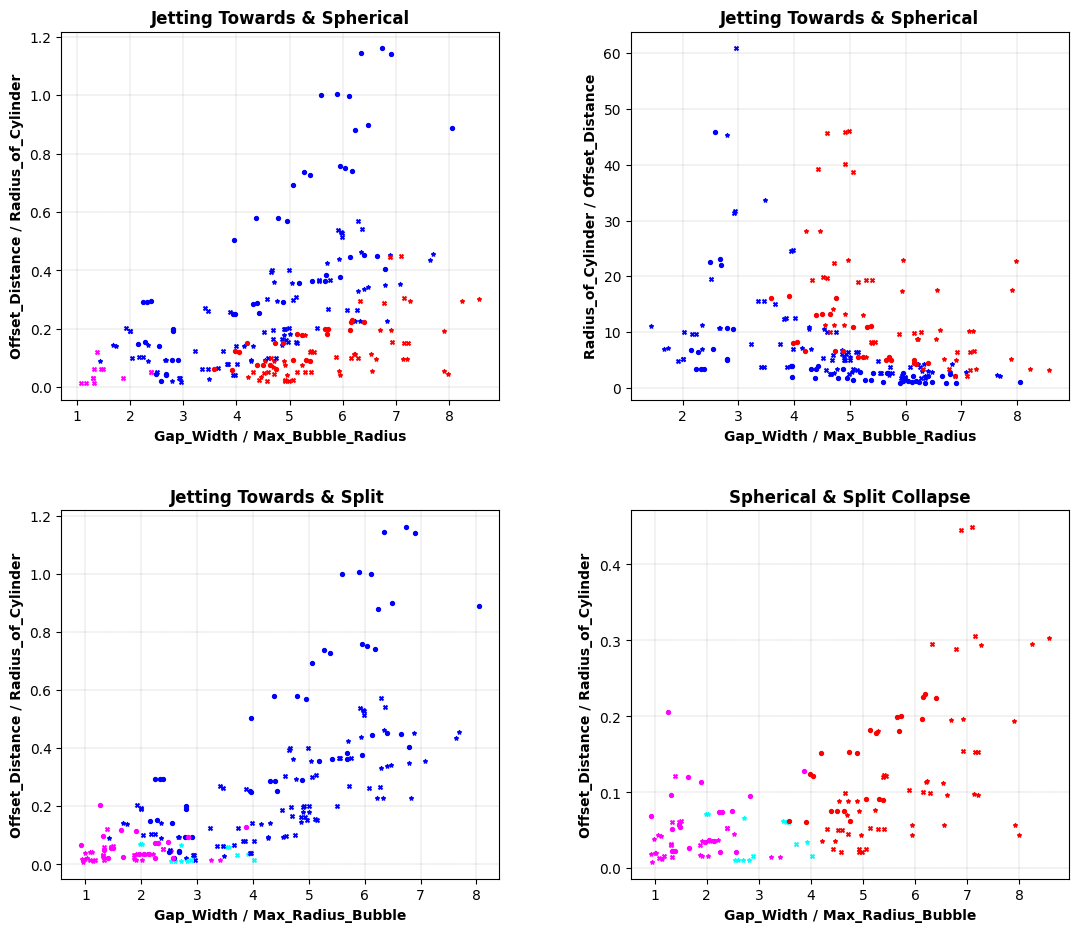

In [22]:
plt.subplots(figsize=(13, 11))


plt.subplot(2,2,1)
plt.scatter(mm_50_jetting_towards["W'"], mm_50_jetting_towards["s'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8, marker = "*")
plt.scatter(mm_50_spherical_collapse["W'"], mm_50_spherical_collapse["s'"], color = 'red', label = "Spherical Collapse", s = 8, marker = "*")

plt.scatter(mm_40_jetting_towards["W'"], mm_40_jetting_towards["s'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8, marker = "x")
plt.scatter(mm_40_spherical_collapse["W'"], mm_40_spherical_collapse["s'"], color = 'red', label = "Spherical Collapse", s = 8, marker = "x")
plt.scatter(mm_40_split_collapse["W'"], mm_40_split_collapse["s'"], color = 'fuchsia', label = "Split Collapse", s = 8, marker = "x")

plt.scatter(mm_25_jetting_towards["W'"], mm_25_jetting_towards["s'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(mm_25_spherical_collapse["W'"], mm_25_spherical_collapse["s'"], color = 'red', label = "Spherical Collapse", s = 8)

plt.ylabel("Offset_Distance / Radius_of_Cylinder", fontweight = "bold"), plt.xlabel("Gap_Width / Max_Bubble_Radius", fontweight = "bold")
plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting Towards & Spherical', fontweight = "bold")



#Next Plot
plt.subplot(2,2,2)
plt.scatter(mm_50_jetting_towards["W'"], 1/mm_50_jetting_towards["s'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8, marker = "*")
plt.scatter(mm_50_spherical_collapse["W'"], 1/mm_50_spherical_collapse["s'"], color = 'red', label = "Spherical Collapse", s = 8, marker = "*")

plt.scatter(mm_40_jetting_towards["W'"], 1/mm_40_jetting_towards["s'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8, marker = "x")
plt.scatter(mm_40_spherical_collapse["W'"], 1/mm_40_spherical_collapse["s'"], color = 'red', label = "Spherical Collapse", s = 8, marker = "x")

plt.scatter(mm_25_jetting_towards["W'"], 1/mm_25_jetting_towards["s'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(mm_25_spherical_collapse["W'"], 1/mm_25_spherical_collapse["s'"], color = 'red', label = "Spherical Collapse", s = 8)

plt.ylabel("Radius_of_Cylinder / Offset_Distance", fontweight = "bold"), plt.xlabel("Gap_Width / Max_Bubble_Radius", fontweight = "bold")
plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting Towards & Spherical', fontweight = "bold")



# Next Plot
plt.subplot(2,2,3)
plt.scatter(mm_50_jetting_towards["W'"], mm_50_jetting_towards["s'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8, marker = "*")
plt.scatter(mm_50_split_collapse["W'"], mm_50_split_collapse["s'"], color = 'fuchsia', label = "Split Collapse", s = 8, marker = "*")
plt.scatter(mm_50_split_after_collapse["W'"], mm_50_split_after_collapse["s'"], color = 'cyan', label = "Split After Collapse", s = 8, marker = "*")

plt.scatter(mm_40_jetting_towards["W'"], mm_40_jetting_towards["s'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8, marker = "x")
plt.scatter(mm_40_split_collapse["W'"], mm_40_split_collapse["s'"], color = 'fuchsia', label = "Split Collapse", s = 8, marker = "x")
plt.scatter(mm_40_split_after_collapse["W'"], mm_40_split_after_collapse["s'"], color = 'cyan', label = "Split After Collapse", s = 8, marker = "x")

plt.scatter(mm_25_jetting_towards["W'"], mm_25_jetting_towards["s'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(mm_25_split_collapse["W'"], mm_25_split_collapse["s'"], color = 'fuchsia', label = "Split Collapse", s = 8)

plt.ylabel("Offset_Distance / Radius_of_Cylinder", fontweight = "bold"), plt.xlabel("Gap_Width / Max_Radius_Bubble", fontweight = "bold")
#plt.legend(fontsize = 9),
plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting Towards & Split ', fontweight = "bold")


plt.subplot(2,2,4)
plt.scatter(mm_50_spherical_collapse["W'"], mm_50_spherical_collapse["s'"], color = 'red', label = "Spherical Collapse", s = 8, marker = "*")
plt.scatter(mm_50_split_collapse["W'"], mm_50_split_collapse["s'"], color = 'fuchsia', label = "Split Collapse", s = 8, marker = "*")
plt.scatter(mm_50_split_after_collapse["W'"], mm_50_split_after_collapse["s'"], color = 'cyan', label = "Split After Collapse", s = 8, marker = "*")

plt.scatter(mm_40_spherical_collapse["W'"], mm_40_spherical_collapse["s'"], color = 'red', label = "Spherical Collapse", s = 8, marker = "x")
plt.scatter(mm_40_split_collapse["W'"], mm_40_split_collapse["s'"], color = 'fuchsia', label = "Split Collapse", s = 8, marker = "x")
plt.scatter(mm_40_split_after_collapse["W'"], mm_40_split_after_collapse["s'"], color = 'cyan', label = "Split After Collapse", s = 8, marker = "x")

plt.scatter(mm_25_spherical_collapse["W'"], mm_25_spherical_collapse["s'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(mm_25_split_collapse["W'"], mm_25_split_collapse["s'"], color = 'fuchsia', label = "Split Collapse", s = 8)

plt.ylabel("Offset_Distance / Radius_of_Cylinder", fontweight = "bold"), plt.xlabel("Gap_Width / Max_Radius_Bubble", fontweight = "bold")
plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Spherical & Split Collapse', fontweight = "bold")

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

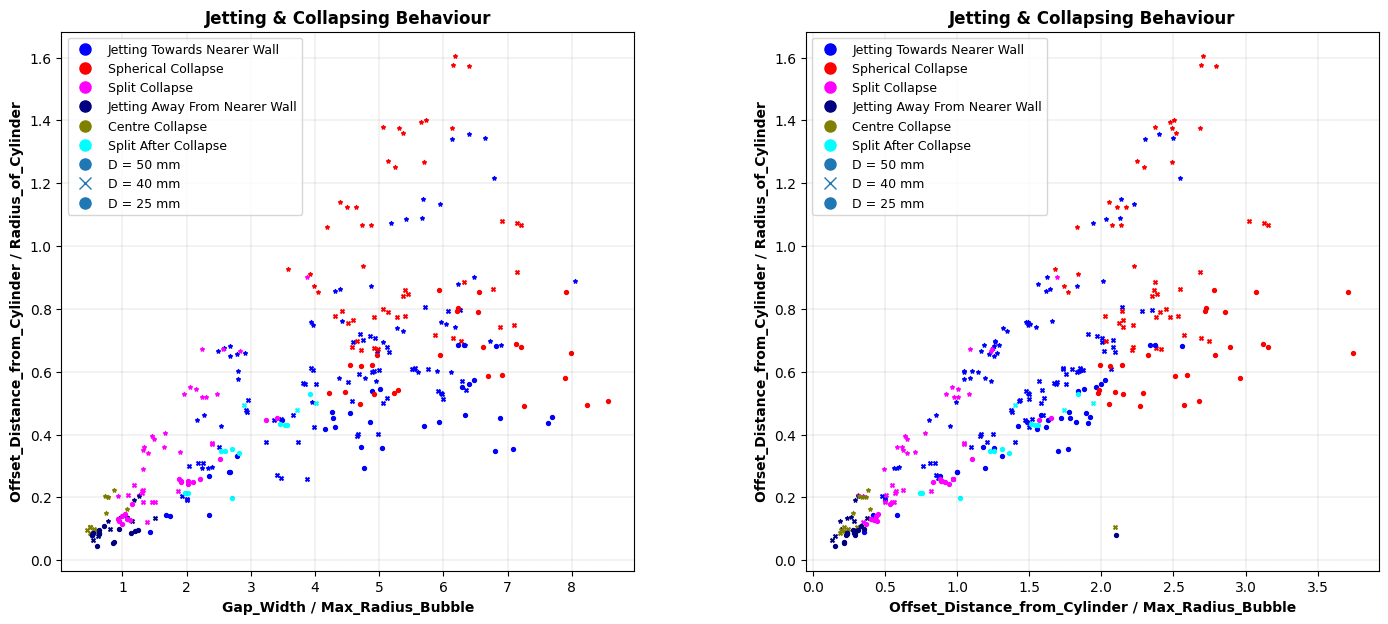

In [23]:
plt.figure(figsize = (17, 7))


plt.subplot(1, 2, 1)
plt.scatter(mm_25_jetting_towards["W'"], mm_25_jetting_towards["e'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8, marker = "*")
plt.scatter(mm_25_spherical_collapse["W'"], mm_25_spherical_collapse["e'"], color = 'red', label = "Spherical Collapse", s = 8, marker = "*")
plt.scatter(mm_25_split_collapse["W'"], mm_25_split_collapse["e'"], color = 'fuchsia', label = "Split Collapse", s = 8, marker = "*")
plt.scatter(mm_25_jetting_away["W'"], mm_25_jetting_away["e'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8, marker = "*")
plt.scatter(mm_25_centre_collapse["W'"], mm_25_centre_collapse["e'"], color = 'olive', label = "Centre Collapse", s = 8, marker = "*")

plt.scatter(mm_40_jetting_towards["W'"], mm_40_jetting_towards["e'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8, marker = "x")
plt.scatter(mm_40_spherical_collapse["W'"], mm_40_spherical_collapse["e'"], color = 'red', label = "Spherical Collapse", s = 8, marker = "x")
plt.scatter(mm_40_split_collapse["W'"], mm_40_split_collapse["e'"], color = 'fuchsia', label = "Split Collapse", s = 8, marker = "x")
plt.scatter(mm_40_jetting_away["W'"], mm_40_jetting_away["e'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8, marker = "x")
plt.scatter(mm_40_centre_collapse["W'"], mm_40_centre_collapse["e'"], color = 'olive', label = "Centre Collapse", s = 8, marker = "x")
plt.scatter(mm_40_split_after_collapse["W'"], mm_40_split_after_collapse["e'"], color = 'cyan', label = "Split After Collapse", s = 8, marker = "x")

plt.scatter(mm_50_jetting_towards["W'"], mm_50_jetting_towards["e'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(mm_50_spherical_collapse["W'"], mm_50_spherical_collapse["e'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(mm_50_split_collapse["W'"], mm_50_split_collapse["e'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(mm_50_jetting_away["W'"], mm_50_jetting_away["e'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter( mm_50_split_after_collapse["W'"], mm_50_split_after_collapse["e'"], color = 'cyan', label = "Split After Collapse", s = 8)

plt.ylabel("Offset_Distance_from_Cylinder / Radius_of_Cylinder", fontweight = "bold"), plt.xlabel("Gap_Width / Max_Radius_Bubble", fontweight = "bold")
plt.grid(True, color='black', linestyle='--', linewidth=0.1)
handles = [mlines.Line2D([], [], color='blue', linestyle='None', marker='o', markersize=8, label="Jetting Towards Nearer Wall"), mlines.Line2D([], [], color='red', linestyle='None', marker='o', markersize=8, label="Spherical Collapse"),
          mlines.Line2D([], [], color='fuchsia', linestyle='None', marker='o', markersize=8, label="Split Collapse"), mlines.Line2D([], [], color='navy', linestyle='None', marker='o', markersize=8, label="Jetting Away From Nearer Wall"),
          mlines.Line2D([], [], color='olive', linestyle='None', marker='o', markersize=8, label="Centre Collapse"), mlines.Line2D([], [], color='cyan', linestyle='None', marker='o', markersize=8, label="Split After Collapse"),
           mlines.Line2D([], [], marker='o', linestyle='None', markersize=8, label="D = 50 mm"), mlines.Line2D([], [], marker='x', linestyle='None', markersize=8, label="D = 40 mm"), mlines.Line2D([], [],
          marker='o', linestyle='None', markersize=8, label="D = 25 mm")]
plt.legend(handles=handles, fontsize=9, loc='upper left')
plt.title('Jetting & Collapsing Behaviour', fontweight = "bold")


# Next Plot
plt.subplot(1, 2, 2)
plt.scatter(mm_25_jetting_towards["f'"], mm_25_jetting_towards["e'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8, marker = "*")
plt.scatter(mm_25_spherical_collapse["f'"], mm_25_spherical_collapse["e'"], color = 'red', label = "Spherical Collapse", s = 8, marker = "*")
plt.scatter(mm_25_split_collapse["f'"], mm_25_split_collapse["e'"], color = 'fuchsia', label = "Split Collapse", s = 8, marker = "*")
plt.scatter(mm_25_jetting_away["f'"], mm_25_jetting_away["e'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8, marker = "*")
plt.scatter(mm_25_centre_collapse["f'"], mm_25_centre_collapse["e'"], color = 'olive', label = "Centre Collapse", s = 8, marker = "*")

plt.scatter(mm_40_jetting_towards["f'"], mm_40_jetting_towards["e'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8, marker = "x")
plt.scatter(mm_40_spherical_collapse["f'"], mm_40_spherical_collapse["e'"], color = 'red', label = "Spherical Collapse", s = 8, marker = "x")
plt.scatter(mm_40_split_collapse["f'"], mm_40_split_collapse["e'"], color = 'fuchsia', label = "Split Collapse", s = 8, marker = "x")
plt.scatter(mm_40_jetting_away["f'"], mm_40_jetting_away["e'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8, marker = "x")
plt.scatter(mm_40_centre_collapse["f'"], mm_40_centre_collapse["e'"], color = 'olive', label = "Centre Collapse", s = 8, marker = "x")
plt.scatter(mm_40_split_after_collapse["f'"], mm_40_split_after_collapse["e'"], color = 'cyan', label = "Split After Collapse", s = 8, marker = "x")

plt.scatter(mm_50_jetting_towards["f'"], mm_50_jetting_towards["e'"], color = 'blue', label = "Jetting Towards Nearer Wall", s = 8)
plt.scatter(mm_50_spherical_collapse["f'"], mm_50_spherical_collapse["e'"], color = 'red', label = "Spherical Collapse", s = 8)
plt.scatter(mm_50_split_collapse["f'"], mm_50_split_collapse["e'"], color = 'fuchsia', label = "Split Collapse", s = 8)
plt.scatter(mm_50_jetting_away["f'"], mm_50_jetting_away["e'"], color = 'navy', label = "Jetting Away From Nearer Wall", s = 8)
plt.scatter( mm_50_split_after_collapse["f'"], mm_50_split_after_collapse["e'"], color = 'cyan', label = "Split After Collapse", s = 8)

plt.ylabel("Offset_Distance_from_Cylinder / Radius_of_Cylinder", fontweight = "bold"), plt.xlabel("Offset_Distance_from_Cylinder / Max_Radius_Bubble", fontweight = "bold")
plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title('Jetting & Collapsing Behaviour', fontweight = "bold")
handles = [mlines.Line2D([], [], color='blue', linestyle='None', marker='o', markersize=8, label="Jetting Towards Nearer Wall"), mlines.Line2D([], [], color='red', linestyle='None', marker='o', markersize=8, label="Spherical Collapse"),
          mlines.Line2D([], [], color='fuchsia', linestyle='None', marker='o', markersize=8, label="Split Collapse"), mlines.Line2D([], [], color='navy', linestyle='None', marker='o', markersize=8, label="Jetting Away From Nearer Wall"),
          mlines.Line2D([], [], color='olive', linestyle='None', marker='o', markersize=8, label="Centre Collapse"), mlines.Line2D([], [], color='cyan', linestyle='None', marker='o', markersize=8, label="Split After Collapse"),
           mlines.Line2D([], [], marker='o', linestyle='None', markersize=8, label="D = 50 mm"), mlines.Line2D([], [], marker='x', linestyle='None', markersize=8, label="D = 40 mm"), mlines.Line2D([], [],
          marker='o', linestyle='None', markersize=8, label="D = 25 mm")]
plt.legend(handles=handles, fontsize=9, loc='upper left')


plt.subplots_adjust(wspace=0.3)
plt.show()